# Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Tarea 1 
### Detección de contornos y del valor de las monedas. 

En este caso la imagen utilizada tiene una iluminación, nitidez y distancia idónea. Con lo que se espera detectar bastante bien el valor de las monedas. 

Umbral fijo: 220


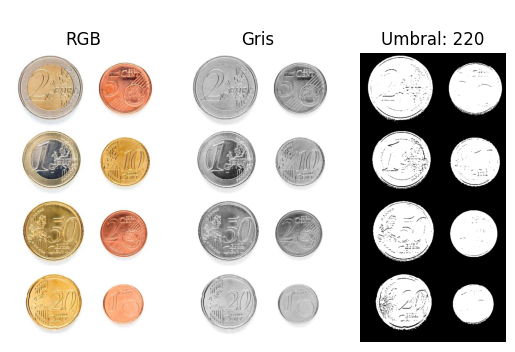

Número de monedas detectadas: 8
Moneda encontrada: one_cent, Valor: 0.01 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: fifty_cents, Valor: 0.5 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda encontrada: five_cents, Valor: 0.05 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Suma total de dinero detectado: 3.88 euros


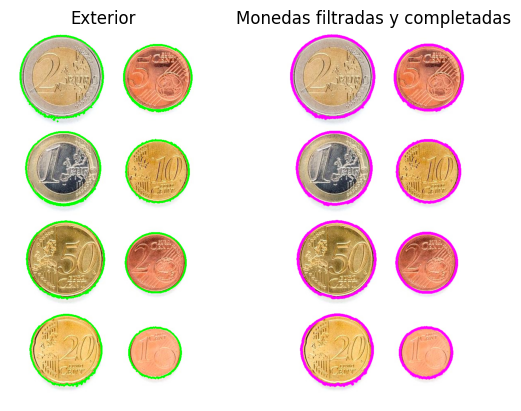

In [2]:

# Definir los diámetros de las monedas 
coin_diameters = {
    "one_cent":  16.25,
    "two_cents": 18.75,
    "five_cents": 21.25,
    "ten_cents": 19.75,
    "twenty_cents": 22.25,
    "fifty_cents": 24.25,
    "one_eur": 23.25,
    "two_eur": 25.75
}

# Asignar valores a cada tipo de moneda (en euros)
coin_values = {
    "one_cent": 0.01,
    "two_cents": 0.02,
    "five_cents": 0.05,
    "ten_cents": 0.10,
    "twenty_cents": 0.20,
    "fifty_cents": 0.50,
    "one_eur": 1.00,
    "two_eur": 2.00
}

# Cargamos la imagen y la mostramos
img = cv2.imread('Monedas.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertimos la imagen a escala de grises
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Umbralización de la imagen usando un umbral fijo
umbral_fijo = 220
ret2, img_th = cv2.threshold(img_gris, umbral_fijo, 255, cv2.THRESH_BINARY_INV)

# Mostrar el umbral utilizado
print(f"Umbral fijo: {umbral_fijo}")

# Mostrar las imágenes
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('RGB')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_gris, cmap='gray')
plt.title('Gris')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th, cmap='gray')
plt.title(f'\nUmbral: {umbral_fijo}')
plt.show()

# Obtención de contornos externos
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_rgb_ext = img_rgb.copy()
img_rgb_circles = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.drawContours(img_rgb_ext, contours, -1, (0,255,0), 3)
# Filtrar por área mínima y circularidad
area_minima = 500  # Definimos un área mínima para evitar contar pequeños puntos
circularidad_minima = 0.5  # Umbral de circularidad más estricto

# Obtención de contornos circulares
circular_contours = []
areas_circulares = []  # Para calcular el área media de las monedas completas
diamentros_detectados = []  # Lista para almacenar diámetros detectados

for contour in contours:
    area = cv2.contourArea(contour)
    perimetro = cv2.arcLength(contour, True)

    if perimetro == 0:  # Evitar división por cero
        continue
    circularidad = (4 * np.pi * area) / (perimetro ** 2)

    if area > area_minima and circularidad >= circularidad_minima:
        circular_contours.append(contour)
        areas_circulares.append(area)
        

# Dibujamos los contornos de las monedas filtradas
cv2.drawContours(img_rgb_circles, circular_contours, -1, (255, 0, 255), 5)

# Calcular el diámetro de las monedas filtradas y almacenarlos en una lista
for contour in circular_contours:
    # Obtener el círculo mínimo que envuelve el contorno
    (x, y), radius = cv2.minEnclosingCircle(contour)
    diameter = 2 * radius  # Calcular el diámetro
    diamentros_detectados.append(diameter)  # Guardar el diámetro en la lista


# Total de dinero
print(f"Número de monedas detectadas: {len(circular_contours)}")

# Regla de tres para calcular los diámetros en milímetros
# Obtener el diámetro máximo en la lista
max_diameter_pixels = max(diamentros_detectados) if diamentros_detectados else 1

# Convertir el diámetro máximo en píxeles a milímetros
diameter_two_eur = coin_diameters["two_eur"]  # 25.75 mm
conversion_factor = diameter_two_eur / max_diameter_pixels

# Lista para almacenar diámetros en mm
diametros_en_mm = []

# Calcular el diámetro en mm para cada diámetro detectado
for diameter in diamentros_detectados:
    diameter_mm = diameter * conversion_factor
    diametros_en_mm.append(diameter_mm)

# Calcular el total de dinero
total_money = 0.0
for detected_diameter in diametros_en_mm:
    closest_coin = None
    closest_diff = float('inf')
    for coin_name, coin_diameter in coin_diameters.items():
        diff = abs(coin_diameter - detected_diameter)
        if diff < closest_diff:
            closest_diff = diff
            closest_coin = coin_name
            
    # Sumar el valor de la moneda encontrada
    if closest_coin:
        total_money += coin_values[closest_coin]
        print(f"Moneda encontrada: {closest_coin}, Valor: {coin_values[closest_coin]} euros")

# Mostrar el total
print(f"Suma total de dinero detectado: {total_money:.2f} euros")

# Mostrar resultados
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_rgb_ext)
plt.title('Exterior')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_rgb_circles)
plt.title('Monedas filtradas y completadas')

plt.show()


## Tarea 1

### Detección de contornos y valor de las monedas teniendo en cuenta la posibilidad de monedas juntas

Las imágenes utilizadas para probar el código no son idóneas, la sombra o brillo y distancia afectan en gran medida al resultado. Se puede utilizar un umbralizado adapatativo automático, o tratar de elegir el umbral para tratar de detectar más monedas. Es importante que siempre haya una moneda de 2 euros en la imagen, ya que se utiliza para el escalado.

Se definen a continuación los conjuntos de datos y varias de las funciones que se utilizarán

In [3]:
# Definir los diámetros de las monedas (en milímetros)
coin_diameters = {
    "one_cent":  16.25,
    "two_cents": 18.75,
    "five_cents": 21.25,
    "ten_cents": 19.75,
    "twenty_cents": 22.25,
    "fifty_cents": 24.25,
    "one_eur": 23.25,
    "two_eur": 25.75
}

# Asignar valores a cada tipo de moneda (en euros)
coin_values = {
    "one_cent": 0.01,
    "two_cents": 0.02,
    "five_cents": 0.05,
    "ten_cents": 0.10,
    "twenty_cents": 0.20,
    "fifty_cents": 0.50,
    "one_eur": 1.00,
    "two_eur": 2.00
}



# Función para encontrar la intersección de una línea con el contorno
def find_intersections(contour, center, angle):
    intersections = []
    angle_rad = np.deg2rad(angle)
    
    # Definimos un radio arbitrario para calcular los puntos extremos de la línea
    radius = 1000  # Radio grande para garantizar que la línea intersecte con el contorno
    p1 = (int(center[0] + radius * np.cos(angle_rad)), int(center[1] + radius * np.sin(angle_rad)))
    p2 = (int(center[0] - radius * np.cos(angle_rad)), int(center[1] - radius * np.sin(angle_rad)))

    # Buscar intersecciones con el contorno
    for i in range(len(contour)):
        q1 = contour[i][0]
        q2 = contour[(i + 1) % len(contour)][0]  # siguiente punto del contorno

        # Encontrar intersección de la línea con el segmento del contorno
        intersection = line_intersection((p1, p2), (q1, q2))
        if intersection is not None:
            intersections.append(intersection)
    
    return intersections

# Función para encontrar la intersección entre dos segmentos de línea

def line_intersection(line1, line2):
    # Extraemos puntos de cada línea
    (x1, y1), (x2, y2) = line1
    (x3, y3), (x4, y4) = line2

    # Cálculo de denominador para la intersección (determinante)
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:  # Las líneas son paralelas
        return None
    
    # Cálculo de intersección usando el método de intersección de líneas
    intersect_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    intersect_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom

    # Verificamos si el punto de intersección está dentro de los límites de ambos segmentos
    if min(x1, x2) <= intersect_x <= max(x1, x2) and min(y1, y2) <= intersect_y <= max(y1, y2) and \
       min(x3, x4) <= intersect_x <= max(x3, x4) and min(y3, y4) <= intersect_y <= max(y3, y4):
        return (int(intersect_x), int(intersect_y))
    return None
def calcular_distancia(punto1, punto2):
    """
    Calcula la distancia euclidiana entre dos puntos en un espacio 2D.

    :param punto1: Tupla (x1, y1) del primer punto.
    :param punto2: Tupla (x2, y2) del segundo punto.
    :return: Distancia entre los dos puntos.
    """
    return np.linalg.norm(np.array(punto1) - np.array(punto2))
# Función para encontrar la moneda más cercana
def encontrar_moneda_mas_cercana(diametro):
    # Inicializar variables para encontrar la moneda más cercana
    moneda_cercana = None
    diferencia_minima = float('inf')
    
    for nombre_moneda, valor_diametro in coin_diameters.items():
        diferencia = abs(valor_diametro - diametro)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            moneda_cercana = nombre_moneda
            
    return moneda_cercana

Se crea la función tarea1() en la que se define el comportamiento del programa. 

A modo general, lee la imagen, la umbraliza, hace la detección de contornos, se detecta la forma circular y la más grande será considerada como la de dos euros. Su diámetro será utilizado para el escalado de las demás monedas. 

En caso de detectar contornos circulares incompletos, se considera que dos monedas están juntas, se traza una linea que pase por el centro e intersecte con los contornos circulares, y la más grande dictará el diámetro de las dos monedas que están juntas. 

Una vez se tiene el diámetro de las monedas, se puede obtener mediante los conjuntos de datos el valor de las monedas.

In [15]:
def tarea1(img, umbral_fijo):
    # Cargamos la imagen y la mostramos
    img = cv2.imread(img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convertimos la imagen a escala de grises
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Mostrar las imágenes
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(img_rgb)
    plt.title('RGB')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(img_gris, cmap='gray')
    plt.title('Gris')

    # Umbralización de la imagen
    if umbral_fijo >= 1:
        print(f"Umbral fijo: {umbral_fijo}")
        _, img_th = cv2.threshold(img_gris, umbral_fijo, 255, cv2.THRESH_BINARY_INV)
        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.imshow(img_th, cmap='gray')
        plt.title(f'\nUmbral: {umbral_fijo}')
        plt.show()
    else:
        img_th = cv2.adaptiveThreshold(img_gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.imshow(img_th, cmap='gray')
        plt.title(f'\nUmbral Adaptativo')
        plt.show()



    # Obtención de contornos externos
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_rgb_ext = img_rgb.copy()
    img_rgb_circles = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cv2.drawContours(img_rgb_ext, contours, -1, (0, 255, 0), 3)
    # Filtrar por área mínima y circularidad
    area_minima = 500  # Definimos un área mínima para evitar contar pequeños puntos
    circularidad_minima = 0.7  # Umbral de circularidad más estricto

    # Obtención de contornos circulares
    circular_contours = []
    areas_circulares = []  # Para calcular el área media de las monedas completas
    diamentros_detectados = []  # Lista para almacenar diámetros detectados

    for contour in contours:
        area = cv2.contourArea(contour)
        perimetro = cv2.arcLength(contour, True)

        if perimetro == 0:  # Evitar división por cero
            continue
        circularidad = (4 * np.pi * area) / (perimetro ** 2)

        if area > area_minima and circularidad >= circularidad_minima:
            circular_contours.append(contour)
            areas_circulares.append(area)

    # Dibujamos los contornos de las monedas filtradas
    cv2.drawContours(img_rgb_circles, circular_contours, -1, (255, 0, 255), 5)

    # Calcular el diámetro de las monedas filtradas y almacenarlos en una lista
    for contour in circular_contours:
        # Obtener el círculo mínimo que envuelve el contorno
        (x, y), radius = cv2.minEnclosingCircle(contour)
        diameter = 2 * radius  # Calcular el diámetro
        diamentros_detectados.append(diameter)  # Guardar el diámetro en la lista
    # Regla de tres para calcular los diámetros en milímetros
    # Obtener el diámetro máximo en la lista
    max_diameter_pixels = max(diamentros_detectados) if diamentros_detectados else 1

    # Convertir el diámetro máximo en píxeles a milímetros
    diameter_two_eur = coin_diameters["two_eur"]  # 25.75 mm
    conversion_factor = diameter_two_eur / max_diameter_pixels

    # Lista para almacenar diámetros en mm
    diametros_en_mm = []

    # Calcular el diámetro en mm para cada diámetro detectado
    for diameter in diamentros_detectados:
        diameter_mm = diameter * conversion_factor
        diametros_en_mm.append(diameter_mm)

    # Aquí es donde encontramos el contorno de la moneda de 2 euros
    if max_diameter_pixels in diamentros_detectados:
        index_of_two_euro = diamentros_detectados.index(max_diameter_pixels)
        contour_two_euro = circular_contours[index_of_two_euro]

        # Calcular el centro de la moneda de 2 euros
        M = cv2.moments(contour_two_euro)
        if M["m00"] != 0:
            center_x = int(M["m10"] / M["m00"])
            center_y = int(M["m01"] / M["m00"])
        else:
            center_x, center_y = 0, 0

        two_euro_center = (center_x, center_y)

        # Generar una línea a partir del centro
        # Genera una línea vertical
        line_start = (center_x, 0)  # Desde el centro hacia arriba
        line_end = (center_x, img.shape[0])  # Desde el centro hacia abajo

        # Encontrar intersecciones con el contorno
        intersections = []
        for i in range(len(contour_two_euro)):
            q1 = tuple(contour_two_euro[i][0])
            q2 = tuple(contour_two_euro[(i + 1) % len(contour_two_euro)][0])

            intersection = line_intersection((line_start, line_end), (q1, q2))
            if intersection is not None:
                intersections.append(intersection)

        # Calcular distancias a las intersecciones
        if len(intersections) >= 2:
            intersection1, intersection2 = intersections[0], intersections[1]
            diametro_coin2 = calcular_distancia(intersection1, intersection2) 
            
            radio = 5  # Ajustar el tamaño del círculo
            
            # Dibuja un círculo en intersection1
            cv2.circle(img_rgb_ext, (int(intersection1[0]), int(intersection1[1])), radio, (0, 0, 255), -1)  # Rojo

            # Dibuja un círculo en intersection2
            cv2.circle(img_rgb_ext, (int(intersection2[0]), int(intersection2[1])), radio, (0, 0, 255), -1)  # Verde

            print(f"Punto Intersección 1: {intersection1}")
            print(f"Centro de la moneda de 2 euros: {two_euro_center}")
            print(f"Punto Intersección 2: {intersection2}")
            print(f"Diametro moneda 2 euros: {diametro_coin2}")

        # Dibujar la línea y el contorno en la imagen para visualización
        img_rgb_with_line = img_rgb.copy()
        cv2.line(img_rgb_with_line, line_start, line_end, (255, 0, 0), 2)  # Línea vertical
        cv2.drawContours(img_rgb_with_line, [contour_two_euro], -1, (0, 255, 0), 2)

        # Mostrar la imagen con círculos
        plt.imshow(cv2.cvtColor(img_rgb_ext, cv2.COLOR_BGR2RGB))  # Asegúrate de convertir de BGR a RGB
        plt.axis("off")
        plt.title("Moneda de 2 euros con intersecciones")
        plt.show()
    else:
        print("No se detectó la moneda de 2 euros.")

    # Nueva detección con circularidad mínima 0.4 para detectar contornos incompletos
    circularidad_incompleta_minima = 0.4
    incomplete_circular_contours = []
    diametros_incompletos = []
    max_diameter = 0  # Para almacenar el diámetro máximo
    largest_contour = None  # Para almacenar el contorno con el diámetro máximo
    best_line_start = (0, 0)  # Para almacenar el punto inicial de la línea más larga
    best_line_end = (0, 0)  # Para almacenar el punto final de la línea más larga
    valores_monedas = []  # Lista para almacenar los valores de las monedas obtenidos

    # Explorar contornos y buscar líneas en todas las direcciones
    for contour in contours:
        area = cv2.contourArea(contour)
        perimetro = cv2.arcLength(contour, True)
        if perimetro == 0:
            continue
        circularidad = (4 * np.pi * area) / (perimetro ** 2)
        
        if area > area_minima and circularidad_minima > circularidad >= circularidad_incompleta_minima:
            incomplete_circular_contours.append(contour)

            # Encuentra el centro de masa del contorno
            M = cv2.moments(contour)
            if M["m00"] != 0:
                center_x = int(M["m10"] / M["m00"])
                center_y = int(M["m01"] / M["m00"])
            else:
                center_x, center_y = 0, 0
            
            center = (center_x, center_y)

            # Probar líneas en múltiples ángulos (en todas las direcciones)
            for angle in range(0, 180, 5):  # Aumentar el ángulo de 5 en 5 grados
                intersections = find_intersections(contour, center, angle)

                # Si encontramos dos intersecciones, calcular la longitud de la línea
                if len(intersections) >= 2:
                    # Ordenamos las intersecciones para asegurarnos de que las comparamos correctamente
                    intersections = sorted(intersections, key=lambda x: x[0])
                    # Calcular la longitud de la línea (diámetro estimado)
                    estimated_diameter = np.linalg.norm(np.array(intersections[0]) - np.array(intersections[1]))
                    diametros_incompletos.append(estimated_diameter)
        

                    # Comparar para encontrar la línea más larga
                    if estimated_diameter > max_diameter:
                        max_diameter = estimated_diameter
                        largest_contour = contour  # Guarda el contorno correspondiente
                        # Suponiendo que 'intersections' contiene tuples en la forma (x, y)
                        best_line_start = intersections[0]  # Guardar el punto inicial de la línea
                        best_line_end = intersections[1]    # Guardar el punto final de la línea

                        distancia_interseccion1 = calcular_distancia(center, best_line_start)
                        distancia_interseccion2 = calcular_distancia(center, best_line_end)


    # Obtener diámetros de las monedas
    diametro_moneda1 = int(coin_diameters["two_eur"] * distancia_interseccion1 / diametro_coin2)
    diametro_moneda2 = int(coin_diameters["two_eur"] * distancia_interseccion2 / diametro_coin2)

    moneda_cercana1 = encontrar_moneda_mas_cercana(diametro_moneda1)
    moneda_cercana2 = encontrar_moneda_mas_cercana(diametro_moneda2)

    # Obtener los valores de las monedas más cercanas
    valor_moneda1 = coin_values[moneda_cercana1]
    valor_moneda2 = coin_values[moneda_cercana2]

    # Agregar los valores de las monedas a la lista
    valores_monedas.append(valor_moneda1)
    valores_monedas.append(valor_moneda2)




    # Dibujar la línea más larga encontrada en la imagen
    if largest_contour is not None:
        # Dibuja el contorno más grande (opcional)
        cv2.drawContours(img_rgb_circles, [largest_contour], -1, (255, 0, 0), 2)

        # Dibuja la línea más larga en verde
        cv2.line(img_rgb_circles, best_line_start, best_line_end, (0, 255, 0), 3)

    numero_monedas_incompletas = len(incomplete_circular_contours)

    num_monedas  = len(circular_contours) + numero_monedas_incompletas
    # Total de dinero
    print(f"Número de monedas incompletas estimadas (truncadas): {numero_monedas_incompletas}")
    print(f"Número de monedas detectadas: {num_monedas}")


    # Calcular el total de dinero
    total_money = 0.0
    valor_moneda_incompleta = 0.0
    for detected_diameter in diametros_en_mm:
        closest_coin = None
        closest_diff = float('inf')
        for coin_name, coin_diameter in coin_diameters.items():
            diff = abs(coin_diameter - detected_diameter)
            if diff < closest_diff:
                closest_diff = diff
                closest_coin = coin_name
                
        # Sumar el valor de la moneda encontrada
        if closest_coin:
            total_money += coin_values[closest_coin]
            print(f"Moneda encontrada: {closest_coin}, Valor: {coin_values[closest_coin]} euros")
    #Monedas juntas
    for valor in valores_monedas:
        # Buscar el nombre de la moneda correspondiente al valor
        valor_moneda_incompleta += valor
        nombre = None
        for key, value in coin_values.items():
            if value == valor:
                nombre = key
                break
                
        # Imprimir el nombre y valor de la moneda
        if nombre:
            print(f"Moneda con contorno incompleto encontrada: {nombre}, Valor: {valor} euros")
    # Sumar el dinero de las monedas incompletas al total

    total_money += valor_moneda_incompleta

    # Mostrar el total
    print(f"Suma total de dinero detectado: {total_money:.2f} euros")

    # Mostrar resultados
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(img_rgb_ext)
    plt.title('Exterior')

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(img_rgb_circles)
    plt.title('Monedas filtradas y completadas')
    plt.show()
    
    def precision(estimado, real):
        error_absoluto = abs(estimado - real)
        # Calculamos la precisión
        accuracy = (1 - (error_absoluto / real))    
        return accuracy

    print(f"\nResultados")
    acc_monedas =  precision(num_monedas, 23)
    print(f"\t[+]Precisión de monedas: {acc_monedas}")

    
    # Calculamos el error absoluto
    acc_valor =  precision(total_money, 6.39)

    print(f"\t[+]Precisión de dinero: {acc_valor}")

    


## Tests

A continuación se harán pruebas de la función creada con distintas imágenes, el segundo parámetro indica el umbral, si es 0, indicará que la umbralización es adaptativa. Mientras que una de uno o superior será una umbralización con el valor indicado. 

Umbral fijo: 170


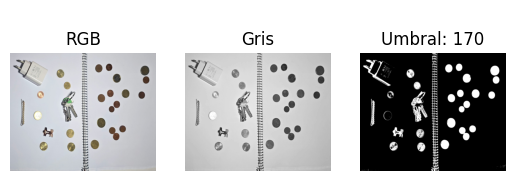

Punto Intersección 1: (1246, 1029)
Centro de la moneda de 2 euros: (1246, 962)
Punto Intersección 2: (1246, 897)
Diametro moneda 2 euros: 132.0


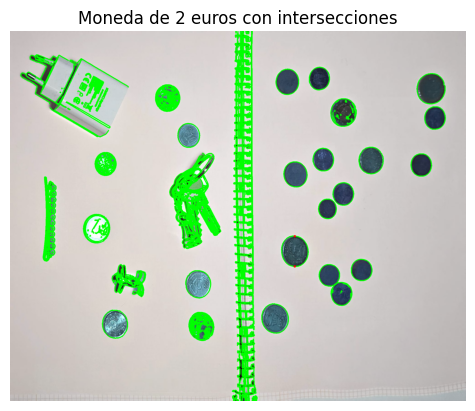

Número de monedas incompletas estimadas (truncadas): 2
Número de monedas detectadas: 18
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda encontrada: fifty_cents, Valor: 0.5 euros
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: one_cent, Valor: 0.01 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: five_cents, Valor: 0.05 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: five_cents, Valor: 0.05 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Suma total 

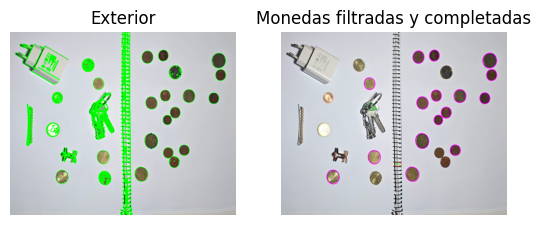


Resultados
	[+]Precisión de monedas: 0.782608695652174
	[+]Precisión de dinero: 0.8967136150234747


In [12]:
tarea1('img3.jpeg', 170)

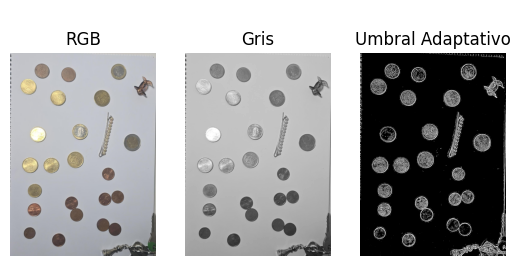

Punto Intersección 1: (723, 428)
Centro de la moneda de 2 euros: (723, 362)
Punto Intersección 2: (723, 297)
Diametro moneda 2 euros: 131.0


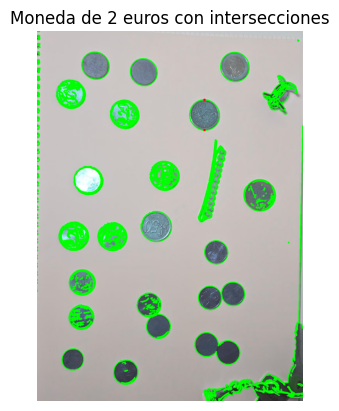

Número de monedas incompletas estimadas (truncadas): 1
Número de monedas detectadas: 9
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda encontrada: fifty_cents, Valor: 0.5 euros
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Suma total de dinero detectado: 4.84 euros


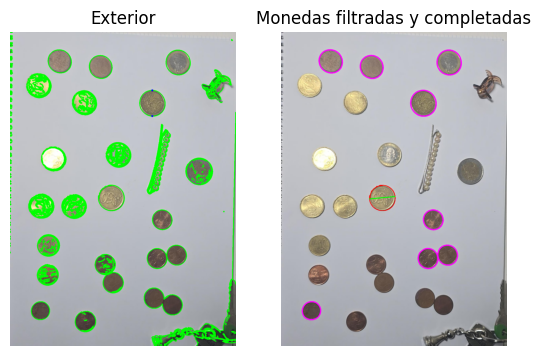


Resultados
	[+]Precisión de monedas: 0.3913043478260869
	[+]Precisión de dinero: 0.7574334898278561


In [13]:
tarea1('img4.jpeg', 0)

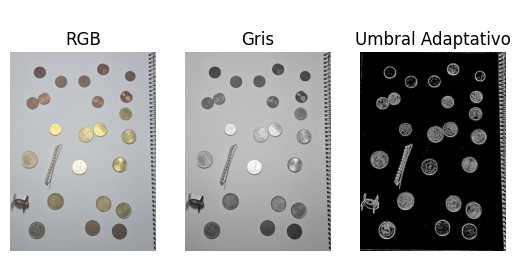

Punto Intersección 1: (751, 1285)
Centro de la moneda de 2 euros: (751, 1219)
Punto Intersección 2: (751, 1155)
Diametro moneda 2 euros: 130.0


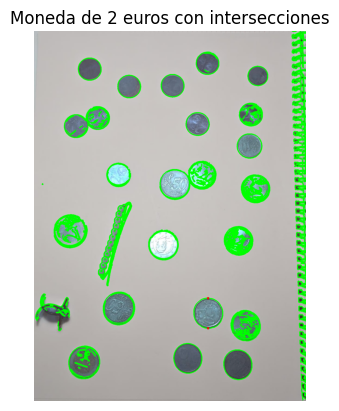

Número de monedas incompletas estimadas (truncadas): 1
Número de monedas detectadas: 10
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: five_cents, Valor: 0.05 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: one_cent, Valor: 0.01 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Moneda con contorno incompleto encontrada: one_cent, Valor: 0.01 euros
Suma total de dinero detectado: 6.48 euros


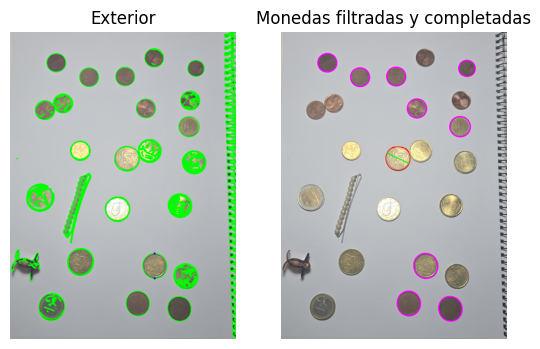


Resultados
	[+]Precisión de monedas: 0.4347826086956522
	[+]Precisión de dinero: 0.9859154929577468


In [14]:
tarea1('img5.jpeg', 0)

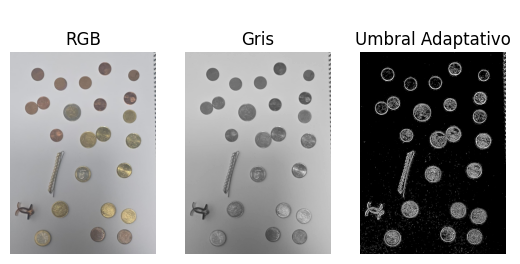

Punto Intersección 1: (467, 522)
Centro de la moneda de 2 euros: (467, 454)
Punto Intersección 2: (467, 387)
Diametro moneda 2 euros: 135.0


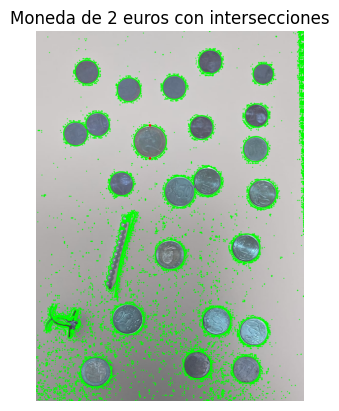

Número de monedas incompletas estimadas (truncadas): 3
Número de monedas detectadas: 21
Moneda encontrada: fifty_cents, Valor: 0.5 euros
Moneda encontrada: five_cents, Valor: 0.05 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: one_eur, Valor: 1.0 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: twenty_cents, Valor: 0.2 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: ten_cents, Valor: 0.1 euros
Moneda encontrada: two_eur, Valor: 2.0 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: one_cent, Valor: 0.01 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda encontrada: two_cents, Valor: 0.02 euros
Moneda con contorno incompleto encontrada: twen

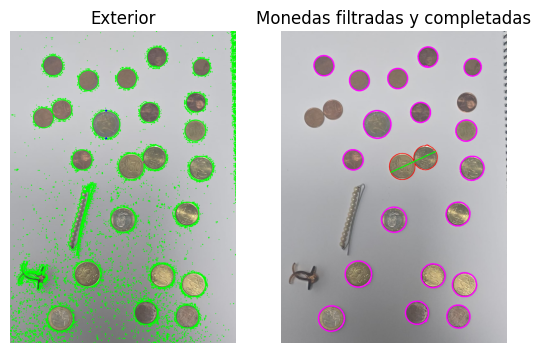


Resultados
	[+]Precisión de monedas: 0.9130434782608696
	[+]Precisión de dinero: 0.7511737089201881


In [8]:
tarea1('img6.jpeg', 0)

# Tarea 1.5
Se ha aplicado una adaptación del código de la tarea anterior para adaptarlo a video. 

In [19]:
import cv2 as cv
import numpy as np

# Inicializamos la captura de video
vid = cv.VideoCapture(0)

# Definimos los diámetros y valores de las monedas
coin_diameters = {
    "one_cent": 16.25,  # Diámetro en mm
    "two_cent": 18.75,
    "five_cent": 21.25,
    "ten_cent": 19.75,
    "twenty_cent": 22.25,
    "fifty_cent": 24.25,
    "one_euro": 23.25,
    "two_euro": 25.75
}

coin_values = {
    "one_cent": 0.01,
    "two_cent": 0.02,
    "five_cent": 0.05,
    "ten_cent": 0.10,
    "twenty_cent": 0.20,
    "fifty_cent": 0.50,
    "one_euro": 1.00,
    "two_euro": 2.00
}

# Variables globales para el seguimiento del mouse
cursor_position = (0, 0)
hovered_coin = None  # Nombre de la moneda que está siendo sobrevolada por el cursor
last_hovered_coin = None  # Para almacenar la última moneda detectada

# Parámetros para el sistema de consenso
consensus_history = []
consensus_threshold = 0.3  # Umbral para cambiar de decisión (30%)

def detect_coins(frame):
    global hovered_coin, last_hovered_coin, consensus_history

    # Convertimos la imagen a escala de grises
    img_gris = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Aplicar un filtro gaussiano para suavizar la imagen
    img_blur = cv.GaussianBlur(img_gris, (5, 5), 0)

    # Umbralización de la imagen
    _, img_th = cv.threshold(img_blur, 120, 255, cv.THRESH_BINARY_INV)

    # Obtención de contornos
    contours, _ = cv.findContours(img_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    circular_contours = []
    areas_circulares = []  # Para calcular el área media de las monedas
    diametros_detectados = []  # Lista para almacenar diámetros detectados

    # Filtrar por área mínima y circularidad
    area_minima = 200  # Reducido para incluir monedas más pequeñas
    circularidad_minima = 0.7

    # Detección de la moneda de dos euros
    two_euro_contour = None
    max_two_euro_diameter = 0

    for contour in contours:
        area = cv.contourArea(contour)
        perimetro = cv.arcLength(contour, True)

        if perimetro == 0:  # Evitar división por cero
            continue
        circularidad = (4 * np.pi * area) / (perimetro ** 2)

        if area > area_minima and circularidad >= circularidad_minima:
            circular_contours.append(contour)
            areas_circulares.append(area)

            # Detección específica de la moneda de dos euros
            (x, y), radius = cv.minEnclosingCircle(contour)
            diameter = 2 * radius  # Diámetro en píxeles
            if diameter > max_two_euro_diameter:  # Guardar el contorno de la moneda de dos euros más grande
                max_two_euro_diameter = diameter
                two_euro_contour = contour

    # Dibujamos los contornos de las monedas filtradas
    cv.drawContours(frame, circular_contours, -1, (255, 0, 255), 2)

    # Cálculo del diámetro en milímetros de la moneda de dos euros detectada
    conversion_factor = 1
    if two_euro_contour is not None:
        (x, y), radius = cv.minEnclosingCircle(two_euro_contour)
        diameter_two_euro_pixels = 2 * radius
        diameter_two_euro = coin_diameters["two_euro"]  # 25.75 mm
        conversion_factor = diameter_two_euro / max(diameter_two_euro_pixels, 1)  # Evitar división por cero

    total_money = 0.0
    coin_count = 0  # Contador de monedas

    # Verificar si el cursor está sobre alguna moneda
    hovered_coin = None  # Reiniciar el nombre de la moneda
    for contour in circular_contours:
        (x, y), radius = cv.minEnclosingCircle(contour)
        diameter = 2 * radius  # Diámetro en píxeles
        
        # Convertir el diámetro a milímetros
        diameter_mm = diameter * conversion_factor
        
        # Encontrar el valor de la moneda más cercana
        closest_coin = None
        closest_diff = float('inf')
        for coin_name, coin_diameter in coin_diameters.items():
            diff = abs(coin_diameter - diameter_mm)
            if diff < closest_diff:
                closest_diff = diff
                closest_coin = coin_name
        
        if closest_coin:
            total_money += coin_values[closest_coin]
            coin_count += 1  # Incrementar el contador de monedas

            # Comprobar si el cursor está dentro de la moneda
            if (cursor_position[0] - x) ** 2 + (cursor_position[1] - y) ** 2 <= (radius ** 2):
                # Verificar si la nueva moneda es diferente a la última moneda detectada
                if closest_coin != last_hovered_coin:
                    # Solo cambiar si la diferencia es significativa
                    if closest_diff < consensus_threshold * coin_diameters[closest_coin]:
                        hovered_coin = closest_coin
                else:
                    hovered_coin = closest_coin  # Mantener la moneda si no ha cambiado

    # Guardar la moneda actual en el historial
    if hovered_coin:
        consensus_history.append(hovered_coin)
        # Limitar el tamaño del historial a 5 elementos
        if len(consensus_history) > 5:
            consensus_history.pop(0)
    
        # Contar las monedas en el historial
        most_common_coin = max(set(consensus_history), key=consensus_history.count)
        last_hovered_coin = most_common_coin  # Actualizar la última moneda

    # Dibujar el círculo azul en el centro de la moneda de dos euros
    if two_euro_contour is not None:
        (x, y), radius = cv.minEnclosingCircle(two_euro_contour)
        cv.circle(frame, (int(x), int(y)), 5, (255, 0, 0), -1)  # Círculo azul de radio 5

    return frame, total_money, coin_count  # Devuelve el marco, el total y el conteo de monedas

# Definir función para manejar el movimiento del mouse
def mouse_move(event, x, y, flags, param):
    global cursor_position
    cursor_position = (x, y)  # Actualiza la posición del cursor

while True:
    # Leemos el fotograma actual
    ret, frame = vid.read()
    
    # Verificamos que se haya leído correctamente el fotograma
    if not ret:
        break

    # Detectamos monedas en el fotograma
    processed_frame, total_money, coin_count = detect_coins(frame)

    # Mostramos el fotograma resultante con las monedas detectadas
    cv.putText(processed_frame, f'Total Coins: {coin_count}', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
    cv.putText(processed_frame, f'Total Money: {total_money:.2f} euros', (10, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)

    # Mostrar el nombre de la moneda si el cursor está sobre ella
    if hovered_coin:
        cv.putText(processed_frame, f'Hovering over: {hovered_coin.replace("_", " ").capitalize()}', (10, frame.shape[0] - 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)

    cv.imshow('Coin Detection', processed_frame)

    # Manejo de movimiento del mouse
    cv.setMouseCallback('Coin Detection', mouse_move)

    # Si se presiona la tecla 'ESC', salimos del bucle
    if cv.waitKey(20) == 27:
        break

# Libera el objeto de captura y cierra las ventanas
vid.release()
cv.destroyAllWindows()


## Tarea 2 - Microplasticos

Muestreo de las imágenes originales que se procesarán posteriormente

In [ ]:
#Cargamos las imagenes
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

Paquetes utilizados y la función procesar_imagen() diseñada para obtener los contornos necesarios para detectar los objetos a detectar, y obtener métricas sobre la geometría de cada fragmento. Se pasa como parámetro la imagen en cuestión y el área minima que deben tener los fragmentos para ser añadido a la lista de métricas.

In [15]:
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
def procesar_imagen(url, min_area):
    # Cargar la imagen
    image = cv2.imread(url)
    
    # Aumentar el brillo sumando un valor constante a cada canal (evitar desbordamiento)
    image = cv2.add(image, np.array([50, 50, 50], dtype=np.uint8))
    
    # Aplicar suavizado (filtro Gaussiano y mediana) para reducir ruido
    image = cv2.GaussianBlur(image, (9, 9), 0)
    image = cv2.medianBlur(image, 7)
    
    # Convertir la imagen a espacio HSV y extraer la saturación
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    saturation = hsv_image[:, :, 1]
    
    # Crear máscara para píxeles con alta saturación
    mask = saturation > 10
    
    # Establecer píxeles con alta saturación a negro
    image[mask] = 0
    
    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar umbralizado adaptativo para mejorar la detección de bordes
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )
    
    # Dilatar los bordes para realzar estructuras más grandes
    dilated = cv2.dilate(adaptive_thresh, kernel=np.ones((5, 5), np.uint8), iterations=1)
    
    # Encontrar contornos en la imagen
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos pequeños (por área mínima)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Calcular métricas para cada contorno
    metrics = []
    for cnt in contours:
        area = cv2.contourArea(cnt)  # Área en píxeles
        perimeter = cv2.arcLength(cnt, True)  # Perímetro en píxeles
        compactness = (perimeter ** 2) / area if area > 0 else 0  # Compacidad

        # Ajustar el contorno a una elipse y calcular los ejes
        if len(cnt) >= 5:  # Se requiere al menos 5 puntos para ajustar una elipse
            ellipse = cv2.fitEllipse(cnt)
            (x, y), (MA, ma), angle = ellipse  # MA: mayor eje, ma: menor eje
            eccentricity = ma / MA if MA > 0 else 0  # Relación de los ejes de la elipse
        else:
            MA = ma = eccentricity = 0

        # Calcular el centroide
        M = cv2.moments(cnt)
        centroid_x = int(M["m10"] / M["m00"]) if M["m00"] != 0 else 0
        centroid_y = int(M["m01"] / M["m00"]) if M["m00"] != 0 else 0


        # Relación de área de la partícula con el área del contenedor
        # Asumiendo que el contenedor es una imagen de tamaño original
        container_area = image.shape[0] * image.shape[1]
        area_ratio = area / container_area

        # Relación entre ancho y alto del contenedor
        width_ratio = image.shape[1] / image.shape[0]

        metrics.append({
            'area': area,
            'perimeter': perimeter,
            'compactness': compactness,
            'area_ratio': area_ratio,
            'width_ratio': width_ratio,
            'eccentricity': eccentricity,
            'centroid': (centroid_x, centroid_y)
        })

    return image, contours, metrics



Se hace la llamada a la función creada anteriormente, y se crea una función para añadirle a la imagen contornos para ver lo que detecta el programa. 
Se mostrarán las imágenes con los bordes de lo detectado dibujados, y las métricas obtenidas en las imágenes propuestas.

In [ ]:
# Procesar las imágenes
FRA_image, FRA_contours, FRA_metrics = procesar_imagen('FRA.png', 200)
PEL_image, PEL_contours, PEL_metrics = procesar_imagen('PEL.png', 200)
TAR_image, TAR_contours, TAR_metrics = procesar_imagen('TAR.png', 200)
# Mostrar contornos y métricas para FRA
def contorno_metrics():
    cv2.drawContours(FRA_image, FRA_contours, -1, (0, 255, 0), 3)
    plt.imshow(FRA_image)
    plt.title("Contornos de FRA.png")
    plt.axis('off')
    plt.show()

    print("Métricas para FRA:")
    for metric in FRA_metrics:
        print(metric)

    # Mostrar contornos y métricas para PEL
    cv2.drawContours(PEL_image, PEL_contours, -1, (0, 255, 0), 3)
    plt.imshow(PEL_image)
    plt.title("Contornos de PEL.png")
    plt.axis('off')
    plt.show()

    print("Métricas para PEL:")
    for metric in PEL_metrics:
        print(metric)

    # Mostrar contornos y métricas para TAR
    cv2.drawContours(TAR_image, TAR_contours, -1, (0, 255, 0), 3)
    plt.imshow(TAR_image)
    plt.title("Contornos de TAR.png")
    plt.axis('off')
    plt.show()

    print("Métricas para TAR:")
    for metric in TAR_metrics:
        print(metric)
contorno_metrics()

Se crea una función destinada a tomar el grupo de datos obtenidos en imágenes que contienen un solo tipo de objeto. Se crean 3 listas con las métricas de deteccion obtenidas y se le asigna el grupo al que pertenece.

Se crea el clasificador K-Nearest Neighbors (KNN) y se entrena con el array de métricas y el grupo que le corresponde. 
Una vez hecho esto, se muestran los resultados del entrenamiento con el mismo conjunto de entrenamiento. 

A continuación se crea una función que mide el rendimiento de la clasificación mediante una seria de parámetros, además, se crea una matriz de confusión.

Para terminar añadí una métrica ficticia para ver qué le asignaba.

In [ ]:
def entrenamiento_y_resultados():
    # Asignar etiquetas de grupo
    all_metrics = FRA_metrics + PEL_metrics + TAR_metrics
    labels = [0] * len(FRA_metrics) + [1] * len(PEL_metrics) + [2] * len(TAR_metrics)
    print(f"[i] Número de Detecciones:")
    print(f"\tHay {len(FRA_metrics)} detecciones de FRA.")
    print(f"\tHay {len(PEL_metrics)} detecciones de PEL.")
    print(f"\tHay {len(TAR_metrics)} detecciones de TAR.")

    # Combinar todas las métricas en un solo arreglo
    metrics_array = np.array([[metric['area'], metric['perimeter'], metric['compactness'], 
                            metric['area_ratio'], metric['width_ratio'], metric['eccentricity']] 
                            for metric in all_metrics])

    # Crear el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(metrics_array, labels)  # Entrenar el modelo

    # Imprimir los resultados de clasificación
    predictions = knn.predict(metrics_array)

    print("\nResultados de clasificación:")
    for idx, metric in enumerate(all_metrics):
        print(f"\tObjeto {idx} es del grupo {predictions[idx]}, Grupo real: {labels[idx]}")
    return labels, predictions, knn    
labels, predictions, knn = entrenamiento_y_resultados()
def rendimiento():
    # Cálculo de métricas de rendimiento
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1score = f1_score(labels, predictions, average='weighted')

    print(f"\nMétricas de rendimiento:")
    print(f"Accuracy (TP/(n))= {accuracy}")
    print(f"Precision (TP/(TP+FP)) = {precision}")
    print(f"Recall (TP/(TP+FN)) = {recall}")
    print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")

    # Crear y mostrar la matriz de confusión
    conf_matrix = confusion_matrix(labels, predictions)
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1.75)  # Tamaños de tipografía

    ax = sns.heatmap(
        conf_matrix,  # Matriz de confusión 2D
        annot=True,  # Muestra números en las celdas
        fmt='d',  # Valores enteros
        cbar=False,  # Sin barra de colores
        cmap='Blues'  # Mapa de colores
    )

    # Etiquetas matriz de confusión
    label_font = {'size': '20'}
    ax.set_xlabel("Predicción", labelpad=20, fontdict=label_font)
    ax.set_ylabel("Real/Anotado", labelpad=20, fontdict=label_font)
    ax.set_title("Matriz de Confusión", fontsize=24)
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['FRA', 'PEL', 'TAR'], fontsize=16)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['FRA', 'PEL', 'TAR'], fontsize=16)
    plt.show()
    
rendimiento()
# Función para predecir el grupo de un nuevo objeto basado en sus métricas
def predecir_clase_nuevo_objeto(nuevo_objeto_metrics):
    # Convertir las métricas del nuevo objeto a un arreglo
    new_metrics_array = np.array([[nuevo_objeto_metrics['area'], 
                                    nuevo_objeto_metrics['perimeter'], 
                                    nuevo_objeto_metrics['compactness'], 
                                    nuevo_objeto_metrics['area_ratio'], 
                                    nuevo_objeto_metrics['width_ratio'], 
                                    nuevo_objeto_metrics['eccentricity']]])

    # Predecir el grupo del nuevo objeto
    predicted_label = knn.predict(new_metrics_array)
    return predicted_label[0]

# Ejemplo de uso de la predicción con métricas de un nuevo objeto
nuevo_objeto = {
    'area': 2500,  
    'perimeter': 300,  
    'compactness': 0.5,  
    'area_ratio': 0.1, 
    'width_ratio': 1.5, 
    'eccentricity': 0.8 
}
grupo_predicho = predecir_clase_nuevo_objeto(nuevo_objeto)
print(f"El nuevo objeto pertenece al grupo: {grupo_predicho}")



Se hace lo mismo que antes con otras imágenes que contienen más objetos.  

In [ ]:
# Procesar las imágenes
FRA_image, FRA_contours, FRA_metrics = procesar_imagen('fragment-03-olympus-10-01-2020.JPG', 800)
PEL_image, PEL_contours, PEL_metrics = procesar_imagen('pellet-03-olympus-10-01-2020.JPG', 400)
TAR_image, TAR_contours, TAR_metrics = procesar_imagen('tar-03-olympus-10-01-2020.JPG', 400)

contorno_metrics()

### Resultados

In [ ]:
labels, predictions, knn = entrenamiento_y_resultados()
rendimiento()

Se hace la detección con una imagen que contenga todos los tipos de objetos. Se hace teniendo en cuenta el último entrenamiento realizado, con lo que cambios en la toma de la foto, como es la distancia, brillo, etc pueden resultar en una peor detección.

Esto último es el caso de la imagen esta, no se hizo con las mismas condiciones que el entrenamiento previo, con lo que son menos fiables los resultados. Y no se pudo hacer una matriz de confusión por no tener los valores reales a mano. 

In [ ]:
Prueba_image, Prueba_contours, Prueba_metrics = procesar_imagen('MPs.JPG', 200)

cv2.drawContours(Prueba_image, Prueba_contours, -1, (0, 255, 0), 3)
plt.imshow(Prueba_image)
plt.title("Contornos de MPs.JPG")
plt.axis('off')
plt.show()

c0 = 0
c1 = 0
c2 = 0
for metric in Prueba_metrics:
    grupo_predicho = predecir_clase_nuevo_objeto(metric)
    if grupo_predicho == 0:
        c0 += 1
    if grupo_predicho == 1:
        c1 += 1
    if grupo_predicho == 2:   
        c2 += 1 
print(f"Se detectaron {c0} del Grupo 0, correspondiente a FRA") 
print(f"Se detectaron {c1} del Grupo 1, correspondiente a PEL")   
print(f"Se detectaron {c2} del Grupo 2, correspondiente a TAR")       



In [21]:
import cv2

# Función para mostrar la imagen escalada y mostrar el nombre para cada contorno encontrado
def mostrar_imagen_con_interactividad(image, contours, predicciones, escala=1.0):
    
    # Obtener las dimensiones originales de la imagen
    height_original, width_original = image.shape[:2]
    
    # Escalar la imagen para la visualización
    image_scaled = cv2.resize(image, (int(width_original * escala), int(height_original * escala)))

    # Dibujar los nombres de las partículas sobre la imagen
    for i, cnt in enumerate(contours):
        # Obtener el centro del contorno para colocar el texto
        M = cv2.moments(cnt)
        if M["m00"] != 0:  # Evitar división por cero
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            
            # Obtener el nombre de la partícula
            texto = f"{['FRA', 'PEL', 'TAR'][predicciones[i]]}"
            
            # Dibujar el texto en la imagen escalada
            cv2.putText(image_scaled, texto, (int(cX * escala), int(cY * escala)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (200, 0, 0), 2)

    # Crear una ventana para mostrar la imagen
    cv2.namedWindow("Prueba_Final")

    while True:
        # Mostrar la imagen escalada con los nombres de las partículas
        cv2.imshow("Prueba_Final", image_scaled)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Presionar 'q' para cerrar la ventana
            break

    cv2.destroyAllWindows()

predicciones = [predecir_clase_nuevo_objeto(metric) for metric in Prueba_metrics]

# Llamada a la función con los datos
mostrar_imagen_con_interactividad(Prueba_image, Prueba_contours, predicciones, escala=0.5)  # Cambia 'escala' según lo que necesites


In [22]:
# Función para mostrar la imagen escalada y detectar el contorno bajo el clic
def mostrar_imagen_con_interactividad(image, contours, predicciones, escala=1.0):
    
    # Obtener las dimensiones originales de la imagen
    height_original, width_original = image.shape[:2]
    
    # Escalar la imagen para la visualización
    image_scaled = cv2.resize(image, (int(width_original * escala), int(height_original * escala)))

    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:  # Detectar el clic izquierdo
            # Convertir las coordenadas del clic a las coordenadas originales de la imagen
            x_original = int(x / escala)
            y_original = int(y / escala)

            # Verificar si el clic está sobre algún contorno
            for i, cnt in enumerate(contours):
                if cv2.pointPolygonTest(cnt, (x_original, y_original), False) >= 0:
                    texto = f"{['FRA', 'PEL', 'TAR'][predicciones[i]]}"
                    cv2.putText(image_scaled, texto, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (200, 0, 0), 2)
                    break  # Salir del bucle después de encontrar el primer contorno
        return             

    # Crear una ventana para mostrar la imagen
    cv2.namedWindow("Prueba_Final")
    cv2.setMouseCallback("Prueba_Final", mouse_callback)

    while True:
        # Mostrar la imagen escalada
        cv2.imshow("Prueba_Final", image_scaled)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Presionar 'q' para cerrar la ventana
            break

    cv2.destroyAllWindows()

predicciones = [predecir_clase_nuevo_objeto(metric) for metric in Prueba_metrics]

# Llamada a la función con los datos
mostrar_imagen_con_interactividad(Prueba_image, Prueba_contours, predicciones, escala=0.5)  # Cambia 'escala' según lo que necesites
